# **Covid-19 Sentiment Analysis - Part II**
This part contains the word tokenizaiton and cleaning process

In [1]:
import pandas as pd
import thulac
import seaborn as sns
import matplotlib.pyplot as plt

myfile = './train_df.csv'
with open(myfile,'r', errors = 'ignore') as f:
    raw_data = pd.read_csv(f,)
    
# raw_data = raw_data.rename(columns={"微博id": "ID", "微博发布时间": "time", '发布人账号':'user','微博中文内容':'content',
#                         '微博图片':'pic', '微博视频':'video','情感倾向':'sentiment'})

In [2]:
df = raw_data.copy()

In [3]:
df.shape

(99907, 6)

## 1. Constraint content length 
According to density plot, we only keep contents <= 150 words

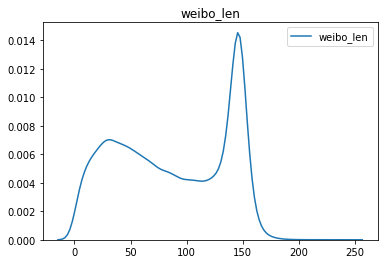

In [4]:
df['weibo_len'] = df['content'].astype(str).apply(len)
sns.kdeplot(df['weibo_len'])
plt.title('weibo_len')
plt.show()

In [5]:
df = df[df.weibo_len<=150]
df.shape

(93361, 7)

## 3.Remove symbols and non-Chinese

In [6]:
df.content[0]

'写在年末冬初孩子流感的第五天，我们仍然没有忘记热情拥抱这2020年的第一天。带着一丝迷信，早晨给孩子穿上红色的羽绒服羽绒裤，祈祷新的一年，孩子们身体康健。仍然会有一丝焦虑，焦虑我的孩子为什么会过早的懂事，从两岁多开始关注我的情绪，会深沉地说：妈妈，你终于笑了！这句话像刀子一样扎入我?展开全文c'

In [7]:
import regex as re
# remove symbol, number and letter
symbols = "[a-zA-Z0-9\s+\.\!\/_,$%^*()??;；：【】+\"\'\[\]\\]+|[+——！，;:。？《》、~@#￥%……&*（）“”.=-]+"
df['content'] = df['content'].astype(str).apply(lambda x : re.sub(symbols, '', x))

#pre-cleaning, deleting or filtering unnecessary words like 'show more'
df['content'] = df['content'].astype(str).apply(lambda x : x.replace("展开全文", ""))

#remove non-chinese
pattern = re.compile(r'[^\u4e00-\u9fa5]')
df['content'] = df['content'].astype(str).apply(lambda x : re.sub(pattern,'',x))

In [8]:
df.head()

,ID,time,content,pic,video,sentiment,weibo_len
0,4456072029125500,2020-01-01 23:50:00,写在年末冬初孩子流感的第五天我们仍然没有忘记热情拥抱这年的第一天带着一丝迷信早晨给孩子穿上红...,1,0,0,147
1,4456074167480980,2020-01-01 23:58:00,开年大模型累到以为自己发烧了腰疼膝盖疼腿疼胳膊疼脖子疼的,0,0,-1,47
2,4456054253264520,2020-01-01 22:39:00,邱晨这就是我爹爹发烧快好毕竟美好的假期拿来养病不太好假期还是要好好享受快乐爹新年快乐发烧好了...,1,0,1,99
3,4456061509126470,2020-01-01 23:08:00,新年的第一天感冒又发烧的也太衰了但是我要想着明天一定会好的,1,0,1,30
4,4455979322528190,2020-01-01 17:42:00,问我们意念里有坏的想法了天神就会给记下来那如果有好的想法也会被记下来吗答那当然了有坏的想法天...,0,0,1,145


In [9]:
df.content[0]

'写在年末冬初孩子流感的第五天我们仍然没有忘记热情拥抱这年的第一天带着一丝迷信早晨给孩子穿上红色的羽绒服羽绒裤祈祷新的一年孩子们身体康健仍然会有一丝焦虑焦虑我的孩子为什么会过早的懂事从两岁多开始关注我的情绪会深沉地说妈妈你终于笑了这句话像刀子一样扎入我'

## 2. Word Tokenization

In [10]:
# tokenize by http://thulac.thunlp.org/

thul = thulac.thulac(seg_only=True)  # by default

df['content'] = df['content'].astype(str).apply(lambda x : thul.cut(x,text = True))
#text = thu1.cut(df0.content[0], text=True)  #进行一句话分词
#print(text)
df.head(10)

Model loaded succeed


,ID,time,content,pic,video,sentiment,weibo_len
0,4456072029125500,2020-01-01 23:50:00,写 在 年末 冬初 孩子 流感 的 第五 天 我们 仍然 没有 忘记 热情 拥抱 这 年 的...,1,0,0,147
1,4456074167480980,2020-01-01 23:58:00,开 年 大模型 累 到 以为 自己 发烧 了 腰 疼 膝盖 疼 腿 疼 胳膊 疼 脖子 疼 的,0,0,-1,47
2,4456054253264520,2020-01-01 22:39:00,邱晨 这 就 是 我 爹 爹 发烧 快 好 毕竟 美好 的 假期 拿 来 养 病 不 太 好...,1,0,1,99
3,4456061509126470,2020-01-01 23:08:00,新年 的 第一 天 感冒 又 发烧 的 也 太 衰 了 但是 我 要 想 着 明天 一定 会...,1,0,1,30
4,4455979322528190,2020-01-01 17:42:00,问 我们 意念 里 有 坏 的 想法 了 天神 就 会 给 记 下 来 那 如果 有 好 的...,0,0,1,145
5,4455960703574270,2020-01-01 16:28:00,发高烧 反反复复 眼睛 都 快 睁 不 开 了 今天 室友 带 我 去 看 还 在 发烧 中...,1,0,-1,139
6,4456044141311370,2020-01-01 21:59:00,明天 考试 今天 发烧 跨年 给 我 跨 坏 了 兰州 兰州 交通 大学,0,0,-1,28
7,4456072930597380,2020-01-01 23:53:00,元旦 快乐 枇杷 手法 小结 每个 娃 都 是 有 故事 的 娃 每个 大人 也 是 有 故...,1,0,0,143
8,4456059546766320,2020-01-01 23:00:00,我 真 的 服 了 昨天 去 和 她 说 自己 不 舒服 描述 了 症状 她 说 啊 你 这...,0,0,-1,144
9,4456064361730200,2020-01-01 23:19:00,新年 第一 天 为 自己 鼓掌 发烧 了 也 要 来 看 线 下 演出 因为 热爱 所以 才...,1,0,1,127


## 4. Remove meaningfulless words
Import word list and filter word lists during the count vectorizer part
e.g. stopwords, adverbs...

In [11]:
import csv
myfile = './mystopwords.csv'

stopwords = pd.read_csv(myfile, delimiter='\n', header=None, encoding='utf-8', quoting=csv.QUOTE_NONE)
stopwords.shape

(1893, 1)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


X_train_pre, X_test_pre, y_train, y_test = train_test_split(df['content'].astype(str), df['sentiment'].tolist(), test_size=0.2, random_state=0)

tfidf = TfidfVectorizer(ngram_range = (1,1), stop_words = list(stopwords.values.reshape(1893,)), analyzer = 'word', min_df=0.01)
tfidffit = tfidf.fit(X_train_pre)
X_train = tfidffit.transform(X_train_pre)
tfidf.vocabulary_

/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['lex', '①①', '①②', '①③', '①④', '①⑤', '①⑥', '①⑦', '①⑧', '①⑨', '①ａ', '①ｂ', '①ｃ', '①ｄ', '①ｅ', '①ｆ', '①ｇ', '①ｈ', '①ｉ', '①ｏ', '②①', '②②', '②③', '②④', '②⑤', '②⑥', '②⑦', '②⑧', '②⑩', '②ａ', '②ｂ', '②ｄ', '②ｅ', '②ｆ', '②ｇ', '②ｈ', '②ｉ', '②ｊ', '③①', '③⑩', '③ａ', '③ｂ', '③ｃ', '③ｄ', '③ｅ', '③ｆ', '③ｇ', '③ｈ', '④ａ', '④ｂ', '④ｃ', '④ｄ', '④ｅ', '⑤ａ', '⑤ｂ', '⑤ｄ', '⑤ｅ', '⑤ｆ', '１２', 'ｌｉ', 'ｚｘｆｉｔｌ'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


{'酒精': 161,
 '网页链': 150,
 '社区': 141,
 '口罩': 53,
 '医用': 41,
 '工作': 69,
 '疫情': 129,
 '消毒': 122,
 '小时': 68,
 '病例': 133,
 '确诊': 139,
 '第一': 145,
 '患者': 79,
 '政府': 99,
 '重症': 162,
 '肺炎': 152,
 '疾病': 131,
 '武汉': 116,
 '市场': 70,
 '感冒': 81,
 '病毒': 134,
 '研究': 138,
 '上海': 1,
 '预防': 171,
 '上班': 2,
 '老师': 151,
 '视频': 154,
 '微博': 76,
 '隔离': 169,
 '中国': 6,
 '野味': 163,
 '春节': 109,
 '希望': 71,
 '晚上': 110,
 '出院': 30,
 '影响': 75,
 '感染': 82,
 '加油': 34,
 '致敬': 153,
 '前线': 32,
 '医护': 39,
 '人员': 11,
 '感谢': 84,
 '抗击': 89,
 '新型': 103,
 '第一线': 146,
 '湖北': 123,
 '社会': 140,
 '冠状': 28,
 '动物': 35,
 '发生': 52,
 '出门': 29,
 '今日': 12,
 '发现': 51,
 '新增': 104,
 '消息': 121,
 '评论': 156,
 '发热': 50,
 '困难': 57,
 '控制': 95,
 '建议': 73,
 '医院': 44,
 '支持': 97,
 '基层': 60,
 '防疫': 167,
 '防控': 166,
 '公益': 26,
 '发布': 48,
 '增强': 61,
 '抵抗力': 92,
 '转发': 158,
 '特别': 125,
 '领导': 172,
 '期间': 114,
 '咳嗽': 55,
 '生活': 127,
 '全国': 22,
 '新冠肺炎': 102,
 '月日': 112,
 '医务': 38,
 '新闻': 105,
 '喜欢': 56,
 '防护': 165,
 '公司': 25,
 '身体': 157,
 '医生': 40,
 '措施': 96,


In [13]:
X_train

<74688x173 sparse matrix of type '<class 'numpy.float64'>'
	with 321189 stored elements in Compressed Sparse Row format>